In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# df2= pd.read_excel('Food_Establishment_Inspection_Data.xlsx',sheet_name='main')

In [3]:
df2=pd.read_csv('cleaned_dataset_V1_Violation_Description.csv')
df2.head(2)

,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Violation Description
0,10.0,Unsatisfactory,False,BLUE,5,1.0,"3200 - Insects, rodents, animals not present; ..."
1,10.0,Unsatisfactory,False,RED,5,1.0,0200 - Food Worker Cards current for all food ...


In [7]:
df2.describe()

,Inspection Score,Violation Points,Grade
count,116325.000000,116325.000000,116325.000000
mean,26.826374,8.048124,1.470535
std,21.994129,6.538668,0.617146
min,0.000000,2.000000,1.000000
25%,10.000000,5.000000,1.000000
50%,20.000000,5.000000,1.000000
75%,35.000000,10.000000,2.000000
max,178.000000,30.000000,4.000000


In [120]:
df=df2.loc[:, ['Inspection Score','Inspection Result','Violation Description']]
df.rename(columns={'Inspection Result':'result' , 'Inspection Score':'score','Violation Description':'violation' }, inplace = True)

listviolation=(pd.unique(df['violation']))

listnumeric=[a for a in listviolation if a[0].isnumeric()]
listnonnumeric=[0  if a[0].isnumeric() else a for a in listviolation]
listnonnumeric=[a for a in listnonnumeric if a!=0]
dfnon=pd.DataFrame(data=listnonnumeric, columns=['witoutcode'])
dfcodes=pd.DataFrame(data=listnumeric, columns=['code'])
dfviolation=pd.DataFrame(data=listviolation, columns=['violation'])
dfviolation.head(1)

,violation
0,"3200 - Insects, rodents, animals not present; ..."


In [121]:
def fun(x):
       
        y=dfcodes[dfcodes['code'].str.contains(x[0:20])].iloc[0,0]
        if y:
            return(y)
        else:
            return(0)
    
        
dfviolation['subviolation']=dfviolation['violation'].apply(fun)
dfviolation.head(3)

,violation,subviolation
0,"3200 - Insects, rodents, animals not present; ...","3200 - Insects, rodents, animals not present; ..."
1,0200 - Food Worker Cards current for all food ...,0200 - Food Worker Cards current for all food ...
2,"3400 - Wiping cloths properly used, stored, pr...","3400 - Wiping cloths properly used, stored, pr..."


In [122]:
dfnew= pd.merge(df, dfviolation, on="violation", how="outer")
print(dfnew.sort_values(by= 'violation').tail(1))
dfnew.drop(columns='violation',inplace=True)
dfnew.head(2)

       score          result                            violation  \
83899   10.0  Unsatisfactory  Wiping cloths properly used, stored   

                                            subviolation  
83899  3400 - Wiping cloths properly used, stored, pr...  


,score,result,subviolation
0,10.0,Unsatisfactory,"3200 - Insects, rodents, animals not present; ..."
1,47.0,Unsatisfactory,"3200 - Insects, rodents, animals not present; ..."


In [131]:
# dfe = df.explode('Violation Description')
# df['Violation Description']=df['Violation Description'].map(str)
dfnew = dfnew.astype({'subviolation':'string'})

dfnew['code']=dfnew['subviolation'].apply(lambda x: x[0:4])
dfnew.info()
len(dfnew)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116325 entries, 0 to 116324
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   score         116325 non-null  float64
 1   result        116325 non-null  object 
 2   subviolation  116325 non-null  string 
 3   code          116325 non-null  object 
dtypes: float64(1), object(2), string(1)
memory usage: 4.4+ MB


116325

In [138]:
df2=dfnew.groupby(by=['code','subviolation'],as_index=False,dropna=False).size().sort_values(by='size', ascending=False)
df3=df2.head(10)
df3['percent']=df3['size']/len(dfnew)
df3

/tmp/ipykernel_516/307715590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['percent']=df3['size']/len(dfnew)


,code,subviolation,size,percent
26,2110,2110 - Proper cold holding temperatures (great...,11292,0.097073
45,3400,"3400 - Wiping cloths properly used, stored, pr...",10280,0.088373
8,0600,0600 - Adequate handwashing facilities,9189,0.078994
2,0200,0200 - Food Worker Cards current for all food ...,7184,0.061758
53,4100,4100 - Warewashing facilities properly install...,6794,0.058405
43,3300,3300 - Potential food contamination prevented ...,6443,0.055388
54,4200,"4200 - Food-contact surfaces maintained, clean...",5884,0.050582
27,2120,2120 - Proper cold holding temperatures ( 42 d...,5282,0.045407
55,4300,4300 - Non-food contact surfaces maintained an...,4158,0.035745
17,1400,1400 - Raw meats below and away from ready to ...,3893,0.033467


,code,subviolation,percent
26,2110,2110 - Proper cold holding temperatures (great...,0.097073
45,3400,"3400 - Wiping cloths properly used, stored, pr...",0.088373
8,0600,0600 - Adequate handwashing facilities,0.078994
2,0200,0200 - Food Worker Cards current for all food ...,0.061758
53,4100,4100 - Warewashing facilities properly install...,0.058405
43,3300,3300 - Potential food contamination prevented ...,0.055388
54,4200,"4200 - Food-contact surfaces maintained, clean...",0.050582
27,2120,2120 - Proper cold holding temperatures ( 42 d...,0.045407
55,4300,4300 - Non-food contact surfaces maintained an...,0.035745
17,1400,1400 - Raw meats below and away from ready to ...,0.033467


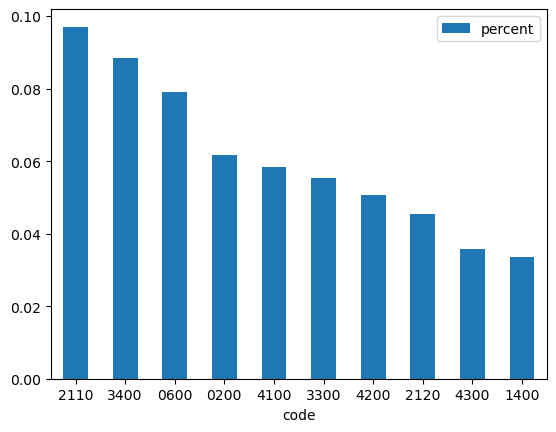

In [154]:
# plt.hist(df['Violation Description'])
# plt.hist(df2)
# plt.show()
ax = df3.plot.bar(x='code', y='percent', rot=0)
df3.loc[:,('code','subviolation','percent')]